# Markdown cell
"""
PROBLEM 8: Hierarchical Clustering

In this problem, you will implement hierarchical clustering using the bottom-up approach. You will start with all the points (or a sampled subset of at least 5000 points) and build the hierarchy by repeatedly joining the closest clusters based on either average distance (avg_dist) or single linkage distance (single_dist) criteria. You will then decide how to cut the hierarchy to form K=2, K=5, or K=10 clusters and evaluate the results. Finally, you will run hierarchical clustering on the moons dataset.

To solve this problem, follow these steps:

1. Start with a dataset containing all the points or sample a subset of at least 5000 points.
2. Implement the bottom-up hierarchical clustering algorithm. Initialize each point as a separate cluster.
3. Calculate the pairwise distances between all clusters based on either average distance (avg_dist) or single linkage distance (single_dist) criteria.
4. Join the closest clusters together and update the distances between the remaining clusters.
5. Repeat steps 3 and 4 until all points are in a single big cluster, forming the full hierarchy.
6. Decide how to cut the hierarchy to obtain K clusters (K=2, K=5, or K=10). You can use criteria such as the maximum distance or the desired number of clusters.
7. Evaluate the clustering results by analyzing the formed clusters. Consider metrics such as cluster purity, silhouette score, or any other appropriate evaluation measure.
8. Run hierarchical clustering on the moons dataset and evaluate the results. Analyze the cluster formation and assess the quality of the clustering.

Optional:

9. Run hierarchical clustering on the 20NG dataset using a sample of 3000 documents.
10. Evaluate the results of hierarchical clustering on the 20NG dataset. Consider the nature of the documents and the meaningfulness of the obtained clusters.

By completing this problem, you will gain hands-on experience with hierarchical clustering and understand its performance on different datasets. You will also learn how to evaluate the clustering results and make decisions regarding the number of clusters. Good luck with your implementation and evaluation!
"""


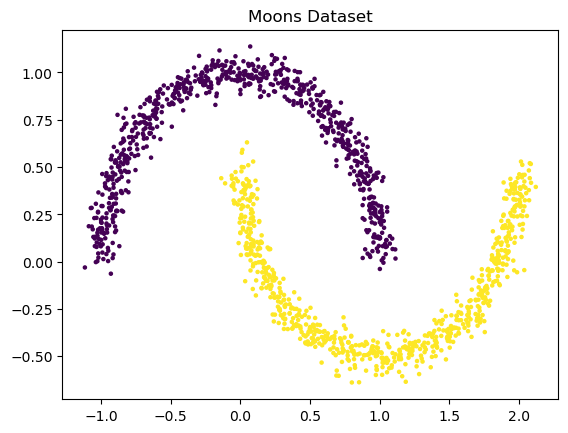

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from scipy.spatial.distance import cdist
from queue import PriorityQueue
import pandas as pd

# Generate moons dataset
X, y = make_moons(n_samples=1500,noise=0.05, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], s=5,c = y)
plt.title("Moons Dataset")
plt.show()


In [127]:


class HierarchicalClustering:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters

    def fit(self, X):
        self.X = X
        self.n_samples = X.shape[0]
        self.labels = np.arange(self.n_samples)
        self.distances = cdist(X, X)  # Pairwise distances between points

        pq = PriorityQueue()
        for i in range(self.n_samples):
            for j in range(i + 1, self.n_samples):
                pq.put((self.distances[i, j], i, j))

        # Perform hierarchical clustering
        while len(np.unique(self.labels)) > self.n_clusters:
            _, i, j = pq.get()
            self._merge_clusters(i, j)

    def _merge_clusters(self, i, j):
        self.labels[self.labels == self.labels[j]] = self.labels[i]
        self.n_samples -= 1

    def cut_tree(self, n_clusters):
        unique_labels = np.unique(self.labels)
        if n_clusters > len(unique_labels):
            raise ValueError("Cannot cut tree into more clusters than the number of distinct labels.")

        labels_sorted = sorted(unique_labels, key=lambda x: np.sum(self.labels == x), reverse=True)
        threshold_label = labels_sorted[n_clusters - 1]
        self.labels[self.labels > threshold_label] = threshold_label + 1

        return self.labels




In [128]:
#X = pd.read_csv('moons.csv')
#X.columns = ['x', 'y']
# Run hierarchical clustering on moons dataset
hc = HierarchicalClustering(n_clusters=2)
hc.fit(X)
labels = hc.cut_tree(n_clusters=2)


In [129]:
X

array([[ 0.97283794, -0.49951516],
       [ 1.84844905,  0.02504018],
       [-0.129004  ,  1.01439792],
       ...,
       [ 0.0973423 ,  0.03751807],
       [ 1.91061504,  0.33279774],
       [ 1.1039567 , -0.50641698]])

In [130]:
X[:,1]

array([-0.49951516,  0.02504018,  1.01439792, ...,  0.03751807,
        0.33279774, -0.50641698])

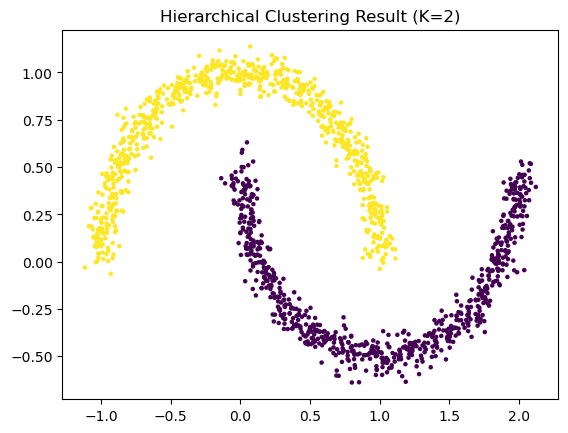

In [131]:

# Plot the clustering result
plt.scatter(X[:,0], X[:,1], c=labels, s=5)
plt.title("Hierarchical Clustering Result (K=2)")
plt.show()

In [132]:
from sklearn.metrics import silhouette_score

# Evaluate clustering performance
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.33627206951919736


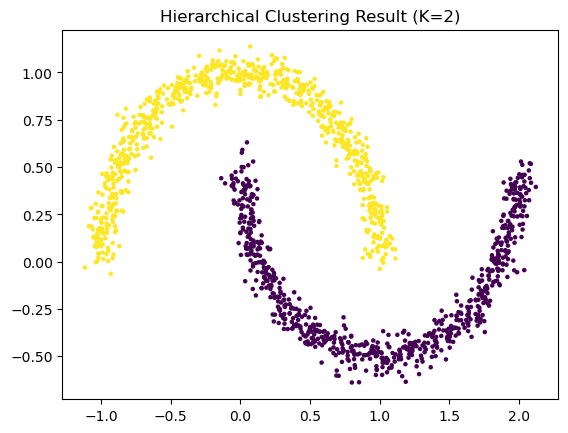

Silhouette Score: 0.33627206951919736


In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Generate moons dataset
X, y = make_moons(n_samples=1500, noise=0.05, random_state=42)

# Perform hierarchical clustering
n_clusters = 2 # Number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,linkage='single')
labels = agg_clustering.fit_predict(X)

# Plot the clustering result
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5)
plt.title("Hierarchical Clustering Result (K=2)")
plt.show()

# Evaluate clustering performance
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


In [145]:
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from scipy.spatial.distance import pdist, squareform,cdist
from scipy.cluster.vq import kmeans2
from matplotlib import pyplot as plt
from scipy.spatial import cKDTree
import numpy as np
import pandas as pd

In [146]:
#compute the distance matrix
matrix_ward = linkage(X, method='ward',metric='euclidean')
matrix_single = linkage(X, method='single',metric='euclidean')

In [147]:
# obtan cluster labels
labels_ward = fcluster(matrix_ward,2, criterion='maxclust')
labels_single = fcluster(matrix_single,2, criterion='maxclust')

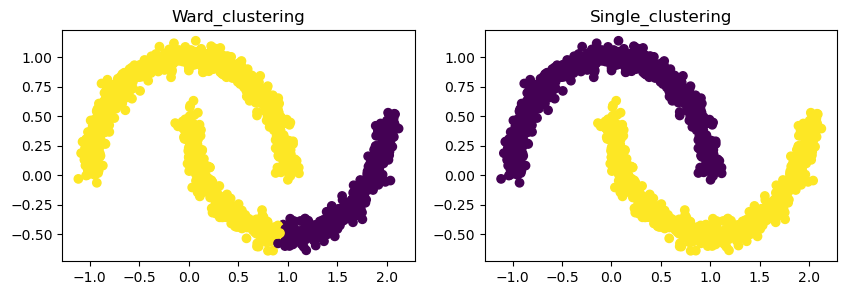

In [148]:
fig,ax = plt.subplots(1,2,figsize=(10,3))

ax[0].scatter(X[:, 0],X[:, 1],c=labels_ward)
ax[0].title.set_text('Ward_clustering')

ax[1].scatter(X[:, 0],X[:, 1],c=labels_single)
ax[1].title.set_text('Single_clustering')